<div style="text-align: center">
 <h1><span style="color: LightGreen">Trabajo Práctico Especial Fundamentos de la Ciencia de Datos</span> </h1>
</div>

#### Facultad de Ciencias Exactas de la Universidad Nacional del Centro de la Provincia de Buenos Aires
### Grupo número 1

Integrantes:
- Dimuro, Agustín Nicolás
- Grillo, Agustín Germán
- Padilla, Tomás Agustín

---


###
<div style="text-align: center"> 
    <h2> Análisis descriptivo de las columnas </h2>
</div>


**Track:** el título de la canción.  
**Artist:** el intérprete o grupo que grabó la canción.  
**Duration:** la duración de la canción, medida en minutos y segundos.  
**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
**Danceability:** una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.  
**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
**Year:** el año en que se lanzó la canción.  

In [1]:
import pandas as pd

df = pd.read_csv("Covers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

---

###
<div style= "text-align: center">
    <h2> Generación del primer Profile Report </h2>
</div>

In [2]:
import ydata_profiling as pp

report = pp.ProfileReport(df)
# report.to_notebook_iframe()
# report.to_file(output_file="covers.html")

---

###
<div style= "text-align: center">
    <h2> Análisis y preprocesamiento todas las variables</h2>
</div>

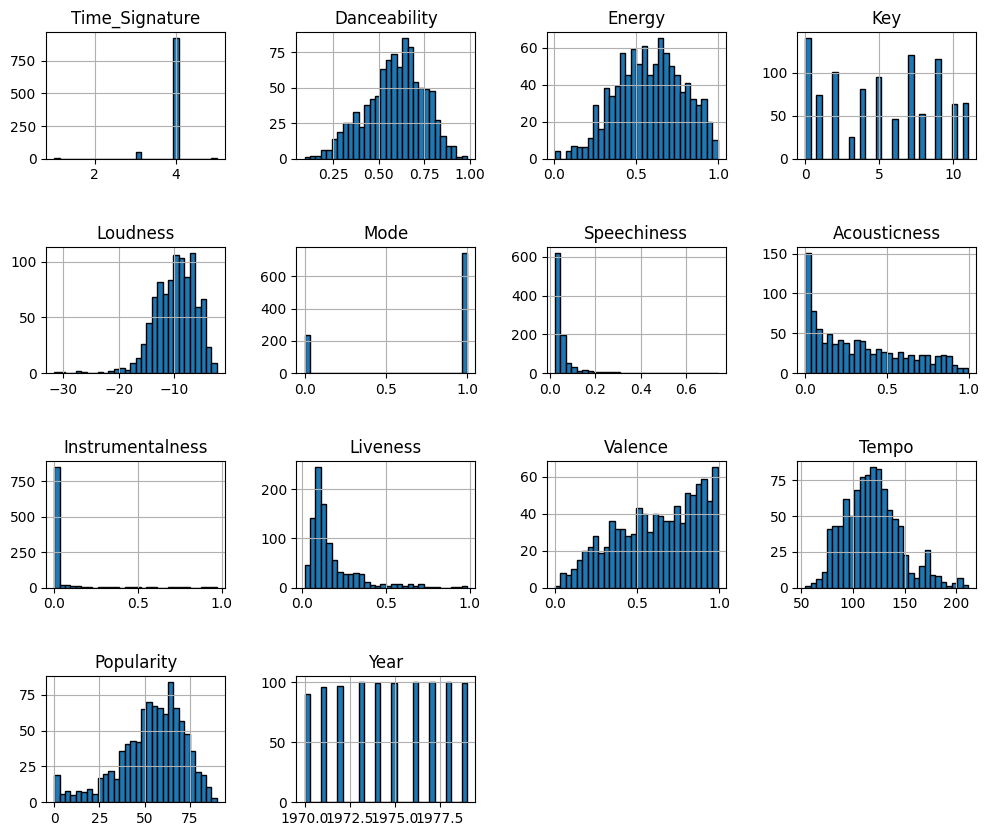

In [3]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Haciendo un breve analisis sobre los histogramas mostrados podemos analizar que:
   
- Las columnas de Danceability y Energy a simple vista parecieran distribuirse normal.   
- Acousticness, Liveness e Instrumentalness tienen un claro sesgo a derecha.   
- Columnas como Loudness y Valence tienen un claro sesgo a izquierda, mientras que Popularity el sesgo es menos notorio.   
- Columnas como Year, Key, Time_signature y Mode son discretas.

In [4]:
df_cuanti = df.copy()
df_cuanti = df_cuanti.drop(columns=['Year', 'Key', 'Time_Signature', 'Mode']) 
df_cuanti.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.587693,0.580877,-9.863873,0.059923,0.332959,0.048240,0.176269,0.621149,118.872768,53.289796
std,0.157856,0.202379,3.718417,0.065535,0.280076,0.165712,0.155862,0.251799,27.023443,18.262967
min,0.094200,0.005320,-31.646000,0.023200,0.000022,0.000000,0.015000,0.000010,53.986000,0.000000
25%,0.486000,0.428000,-12.358500,0.031300,0.076550,0.000000,0.086300,0.421750,99.919750,43.000000
50%,0.600000,0.583000,-9.558500,0.038300,0.270500,0.000050,0.119000,0.650500,117.436500,56.000000
75%,0.698000,0.731250,-7.095500,0.056725,0.544250,0.002822,0.198250,0.845000,134.007750,66.000000
max,0.985000,0.995000,-2.340000,0.737000,0.996000,0.970000,0.985000,0.989000,211.270000,90.000000


Confirmando lo que se vio en los histogramas, podemos ver que la columna Instrumentalness al tener tantos valores en 0, la media y los cuartiles son muy proximos a ese valor. Columnas como Danceability y Energy al encontrarse entre 0 y 1 y distribuirse aproximandamente normal, podemos decir que los cuartiles y la media muestran que a pesar de parecer normal, tienen un poco sesgados los datos hacia la izquierda.

---

###
<div style= "text-align: center">
    <h2> Análisis y preprocesamiento de cada variable</h2>
</div>

Como primer paso creamos una copia del dataset original, a la cual le vamos a aplicar todas las transformaciones necesarias de aqui en adelante con el objetivo de seguir manteniendo el original.

In [5]:
ds_copy=df.copy()

**Duration:** la duración de la canción, medida en minutos y segundos.  
A continuación, para facilitarnos el análisis a futuro de esta columna, decidimos pasar todos los valores de ella a segundos y representarlos en int.

In [6]:
import re

def convertir_a_segundos(duracion):
    minutos, segundos = duracion.split(":")
    return int(minutos) * 60 + int(segundos)

ds_copy["Duration"]=ds_copy["Duration"].apply(convertir_a_segundos)

**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
Valores únicos de la columna Time_signature. No fue necesario aplicar ningun procesamiento sobre la columna.

In [7]:
df["Time_Signature"].value_counts()

Time_Signature
4    924
3     51
1      3
5      2
Name: count, dtype: int64

**Danceability:** una medida de qué tan adecuada es una pista para ser bailada, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
Valores únicos de la columna Danceability. No fue necesario hacer ningun procesamiento previo en esta columna ya que tiene valores validos y no nulos.

In [8]:
df["Danceability"].value_counts()

Danceability
0.637    9
0.680    7
0.665    7
0.649    6
0.639    6
        ..
0.792    1
0.798    1
0.717    1
0.759    1
0.452    1
Name: count, Length: 494, dtype: int64

**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
Valores únicos de la columna Energy. No se le hizo ningun cambio a la columna.

In [9]:
df["Energy"].value_counts()

Energy
0.673    7
0.528    7
0.641    6
0.644    6
0.532    5
        ..
0.374    1
0.903    1
0.535    1
0.277    1
0.777    1
Name: count, Length: 543, dtype: int64

**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
Valores únicos de la columna Key. No hicimos ningun cambio sobre la columna.

In [10]:
df["Key"].value_counts()

Key
0     140
7     121
9     116
2     101
5      95
4      81
1      74
11     65
10     64
8      52
6      46
3      25
Name: count, dtype: int64

**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
Valores únicos de la columna Loudness. Como preprocesamiento de la columna, tomamos la decision de eliminar los numeros después de la coma ya que en todas las paginas web que encontramos información sobre el tema siempre se muestran como números enteros.

In [11]:
df["Loudness"].value_counts()

Loudness
-12.472    3
-4.653     2
-12.264    2
-7.246     2
-12.923    2
          ..
-9.885     1
-9.283     1
-9.711     1
-11.367    1
-8.339     1
Name: count, Length: 916, dtype: int64

In [12]:
ds_copy["Loudness"] = ds_copy["Loudness"].astype(int)
ds_copy["Loudness"].value_counts()

Loudness
-9     114
-7      98
-8      98
-6      93
-10     92
-12     84
-11     73
-13     69
-5      64
-4      53
-14     48
-15     28
-3      18
-16     14
-17      9
-19      6
-2       5
-18      3
-20      3
-21      2
-27      2
-31      1
-30      1
-26      1
-23      1
Name: count, dtype: int64

**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
Valores únicos de la columna Mode. Variable de tipo categorica pero expresada a traves de numeros enteros.

In [13]:
df["Mode"].value_counts()

Mode
1    745
0    235
Name: count, dtype: int64

**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
Valores únicos de la columna Speechiness. No se le realizó ningún tipo de cambio a la columna.

In [14]:
df["Speechiness"].value_counts()

Speechiness
0.0336    9
0.0346    9
0.0341    8
0.0283    8
0.0287    8
         ..
0.0455    1
0.0281    1
0.0390    1
0.0460    1
0.0531    1
Name: count, Length: 455, dtype: int64

**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
Valores únicos de la columna Acousticness. La columna no requería ningún procesamiento previo ya que los valores son válidos.

In [15]:
df["Acousticness"].value_counts()

Acousticness
0.35700    8
0.30500    5
0.48400    5
0.30900    5
0.18100    5
          ..
0.05020    1
0.00115    1
0.48500    1
0.79200    1
0.57100    1
Name: count, Length: 718, dtype: int64

**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.   
Valores únicos de la columna Instrumentalness. No hicimos ningún procesamiento sobre la columna.


In [16]:
df["Instrumentalness"].value_counts()

Instrumentalness
0.000000    285
0.000002      4
0.000122      4
0.001410      3
0.000310      3
           ... 
0.009440      1
0.001240      1
0.000009      1
0.006820      1
0.218000      1
Name: count, Length: 614, dtype: int64

**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
Valores únicos de la columna Liveness. No hicimos ningún procesamiento sobre la columna porque como se ve, los valores son válidos y no hay nulos.

In [17]:
df["Liveness"].value_counts()

Liveness
0.1050    12
0.1080    11
0.1130    10
0.1030    10
0.1200     9
          ..
0.1620     1
0.3480     1
0.0837     1
0.6430     1
0.0521     1
Name: count, Length: 531, dtype: int64

**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
Valores únicos de la columna Valence. Los valores de la columna son validos y estan completos, por lo que decidimos no hacer ningún procesamiento.

In [18]:
df["Valence"].value_counts()

Valence
0.962    9
0.963    8
0.971    6
0.969    6
0.967    5
        ..
0.208    1
0.316    1
0.346    1
0.686    1
0.238    1
Name: count, Length: 570, dtype: int64

**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
Valores únicos de la columna Tempo. En esta columna sí realizamos un procesamiento, ya que por lo que estuvimos investigando en diversas paginas, siempre se muestran como números enteros. Por ende le quitamos los valores después de la coma a cada obvservacion de la columna.

In [19]:
df["Tempo"].value_counts()

Tempo
102.977    3
130.166    2
120.157    2
85.126     2
79.764     2
          ..
113.245    1
90.955     1
110.656    1
137.702    1
115.058    1
Name: count, Length: 955, dtype: int64

In [20]:
ds_copy["Tempo"] = ds_copy["Tempo"].astype(int)
ds_copy["Tempo"].value_counts()

Tempo
109    23
113    21
120    19
114    18
101    17
       ..
183     1
178     1
211     1
67      1
61      1
Name: count, Length: 128, dtype: int64

**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
Valores únicos de la columna Popularity  
Buscamos informacion acerca de la columna, ya que revisando los valores de popularidad de distintas canciones, los valores que tomaban algunas canciones nos parecian extraños. Encontramos una explicacion que la mencionaremos en el informe.   

In [21]:
df["Popularity"].value_counts()

Popularity
63    31
64    31
55    30
49    26
74    26
      ..
9      2
8      1
89     1
21     1
3      1
Name: count, Length: 87, dtype: int64

---

###
<div style= "text-align: center">
    <h2>Gráfico de correlaciones</h2>
</div>

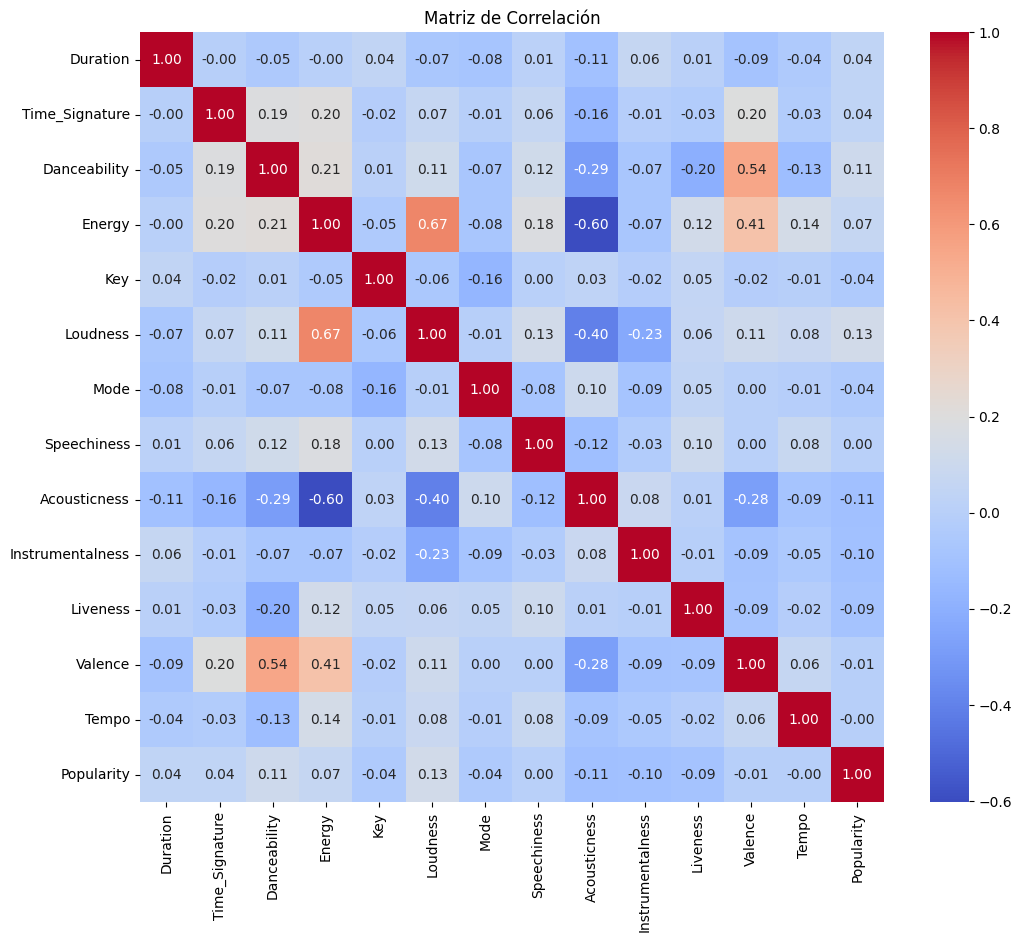

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

ds_numerico=ds_copy.copy()
ds_numerico.drop(["Track", "Artist","Year"], axis=1, inplace=True)

correlation_matrix = ds_numerico.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Analizando el grafico de las correlaciones podemos observar que en este dataset no tenemos correlaciones muy altas entre las columnas, pero las mas altas son entre Acousticness y Energy, con una correlacion de -0.6; entre Loudness y Energy, con un valor de 0.67; entre Valence y Danceability, con una correlacion de 0.54.   
La correlacion entre acousticness y energy no es muy alta, pero la tenemos en cuenta igual ya que no hay tantos valores altos en el dataset.   
La correlacion entre Danceability y Valence es aun mas baja que la anterior por lo que no podemos decir mucho, esta relacion no es lo suficientemente fuerte como para analizarla detenidamente.   
Como se puede observar, la correlacion entre Energy y Loudness es la que resulta que tiene un indice de correlacion mas alto de todo el dataset, ademas de que esta suficientemente cerca del 0.7 como para que podamos decir y demostrar que esta correlacion es alta.


---

###
<div style="text-align: center">
    <h2>Filtrado de los Datos</h2>
</div>

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

ds_filtred=ds_copy.copy() # El ds_filtred va a tener todas las variables cuantitativas del dataset
ds_filtred.drop(["Track", "Artist", "Year"], axis=1, inplace=True)
ds_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          980 non-null    int64  
 1   Time_Signature    980 non-null    int64  
 2   Danceability      980 non-null    float64
 3   Energy            980 non-null    float64
 4   Key               980 non-null    int64  
 5   Loudness          980 non-null    int64  
 6   Mode              980 non-null    int64  
 7   Speechiness       980 non-null    float64
 8   Acousticness      980 non-null    float64
 9   Instrumentalness  980 non-null    float64
 10  Liveness          980 non-null    float64
 11  Valence           980 non-null    float64
 12  Tempo             980 non-null    int64  
 13  Popularity        980 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 107.3 KB


---

###
<div style="text-align: center">
    <h2>Creación y Análisis de Clustering</h2>
</div>

In [24]:
from sklearn.cluster import KMeans

ds_precluster = ds_filtred.copy()
scaler = StandardScaler()
ds_precluster = scaler.fit_transform(ds_precluster)

# separamos las features de los nombres de los países
songs = ds_copy['Track'].copy()

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=9, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides

kmeans.fit(ds_precluster)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(ds_precluster)
print(clusters_kmeans)



[1 3 5 6 1 1 1 0 3 5 3 1 1 1 1 3 6 3 4 3 1 1 3 5 6 5 1 7 3 6 7 6 4 5 1 6 1
 3 4 5 6 4 3 0 3 3 5 5 1 2 6 3 5 2 5 3 1 3 4 6 5 3 3 4 3 5 5 1 5 3 6 4 1 1
 4 5 5 3 3 3 4 4 4 5 0 2 2 8 8 2 1 3 6 6 3 3 4 3 5 7 4 3 3 8 5 1 6 6 3 1 6
 1 0 1 6 3 5 3 1 3 3 3 5 3 6 1 6 3 5 6 4 4 5 6 6 6 6 8 5 3 1 0 6 7 4 4 6 7
 4 3 5 7 6 6 0 6 3 2 6 0 6 6 6 6 5 3 6 4 6 5 3 7 3 3 5 6 0 6 7 5 4 8 6 3 6
 0 5 3 4 1 1 4 4 4 5 4 6 1 6 3 6 1 1 3 6 4 0 2 5 3 3 4 6 1 4 8 1 1 4 6 1 5
 3 4 1 2 3 3 7 3 2 2 3 5 5 3 5 4 3 6 5 1 6 7 5 3 1 0 2 7 0 7 5 3 6 7 5 3 5
 4 6 3 4 5 4 6 5 6 6 6 5 7 6 3 3 8 7 5 3 6 5 3 3 3 3 6 1 5 2 5 4 5 4 6 5 4
 1 6 1 6 4 1 4 3 5 6 5 4 5 2 5 5 3 6 5 6 8 0 4 8 4 4 5 3 2 3 1 1 6 5 6 6 4
 4 3 5 0 7 4 4 6 4 8 1 1 8 4 7 7 0 8 6 1 1 6 4 6 5 5 4 4 5 6 3 6 5 6 4 0 6
 5 4 2 6 6 6 5 4 6 8 4 8 4 7 4 5 5 4 3 0 1 5 0 6 7 3 0 1 3 0 6 0 1 5 4 1 3
 7 3 5 2 4 3 5 4 6 6 5 0 3 3 5 1 1 3 6 4 4 1 6 5 3 2 1 6 2 1 2 6 6 5 2 8 5
 1 4 8 3 6 8 5 6 6 3 6 5 4 5 5 2 5 3 0 5 3 5 0 2 5 4 4 3 5 6 5 6 4 6 5 2 2
 3 1 3 7 3 6 5 1 3 5 5 4 

In [25]:
# Creamos un DataFrame con las canciones y los clusters asignados
cluster_df = pd.DataFrame({'Track': songs, 'Cluster': clusters_kmeans})

# Imprimimos las canciones de cada cluster
for cluster_num in range(9):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())


Cluster 0:
['The House Of The Rising Sun', 'Hey There Lonely Girl', 'I’ll Never Fall In Love Again', 'How Can You Mend A Broken Heart', 'Mr. Bojangles', 'For The Good Times', 'One Less Bell To Answer', 'Don’t Pull Your Love', 'I’ve Found Someone Of My Own', 'Morning Has Broken', 'Hurting Each Other', 'The Happiest Girl In The Whole U.S.A.', 'Me And Mrs. Jones', 'Natural High', 'Break Up To Make Up', 'Funny Face', 'Time In A Bottle', 'Beach Baby', 'Annie’s Song', 'On And On', 'Rock On', 'The Way We Were', 'One Hell Of A Woman', 'Love’s Theme', 'Lucy In The Sky With Diamonds', 'You Are So Beautiful', 'Love Won’t Let Me Wait', 'Cat’s In The Cradle', 'Sara Smile', 'Take It To The Limit', 'Fooled Around And Fell In Love', 'Misty Blue', 'Just To Be Close To You', 'Deep Purple', 'You And Me', 'On And On', 'Somebody To Love', 'Lucille', 'You Light Up My Life', 'When I Need You', 'Weekend In New England', 'After The Lovin’', 'I’ve Got Love On My Mind', 'Tonight’s The Night (GONNA Be Alright)',

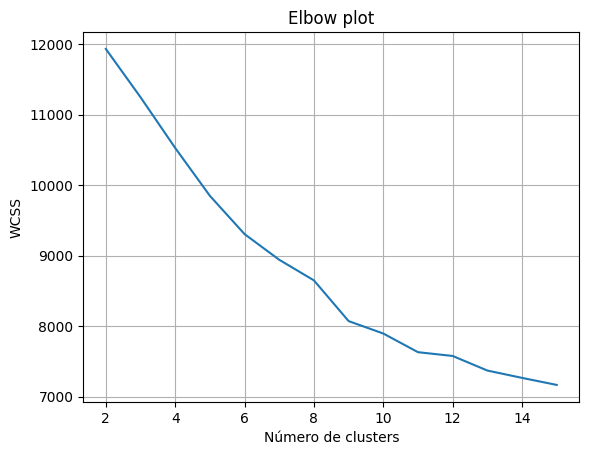

In [26]:
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(ds_precluster)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 16), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

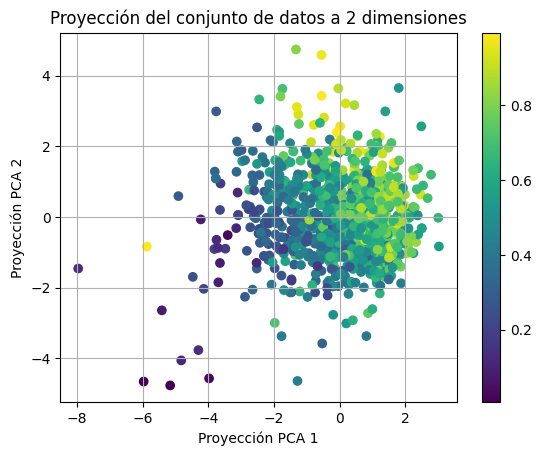

array([0.16381967, 0.10481397])

In [27]:

scaler = StandardScaler()
ds_scaled_reducible = ds_filtred.copy()

ds_scaled_reducible  = ds_scaled_reducible.drop("Energy", axis=1)

ds_scaled = scaler.fit_transform(ds_scaled_reducible)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(ds_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1], c=ds_filtred["Energy"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
# %matplotlib inline
plt.colorbar()
plt.show()


pca.explained_variance_ratio_

La varianza explicada generada por el PCA es demasiado baja, por lo tanto descartamos el uso de este procedimiento de aca en adelante.

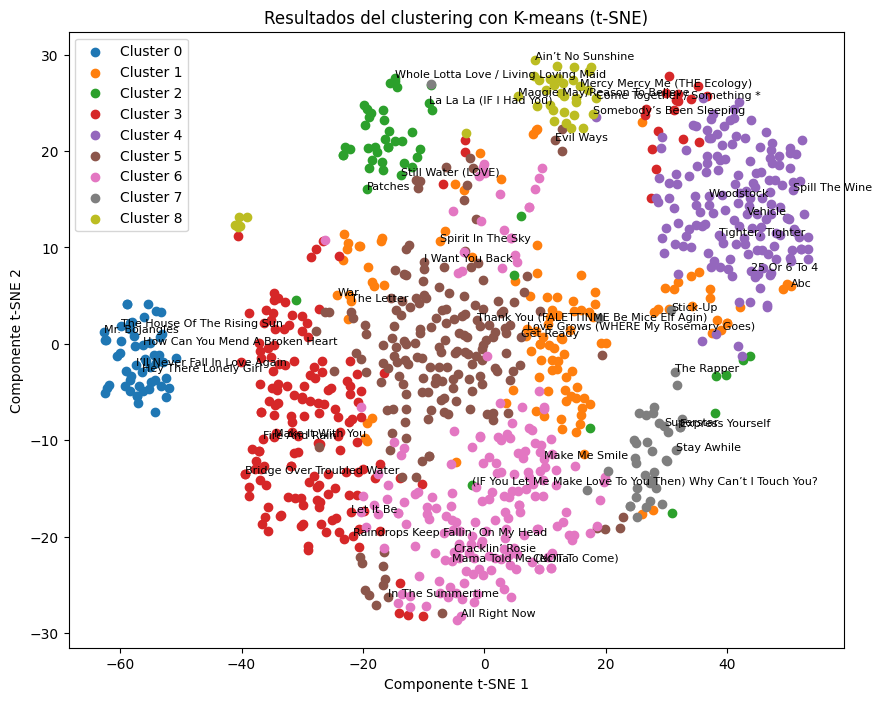

In [28]:
# Reducir la dimensionalidad de los datos usando t-SNE para poder mostrar en un gráfico los clusters para poder analizarlo.

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(ds_precluster)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Track': songs})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(9):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')


  songs_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Track'].tolist()
  songs_to_label = songs_to_label[:5]

  for songs in songs_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Track'] == songs)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], songs, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

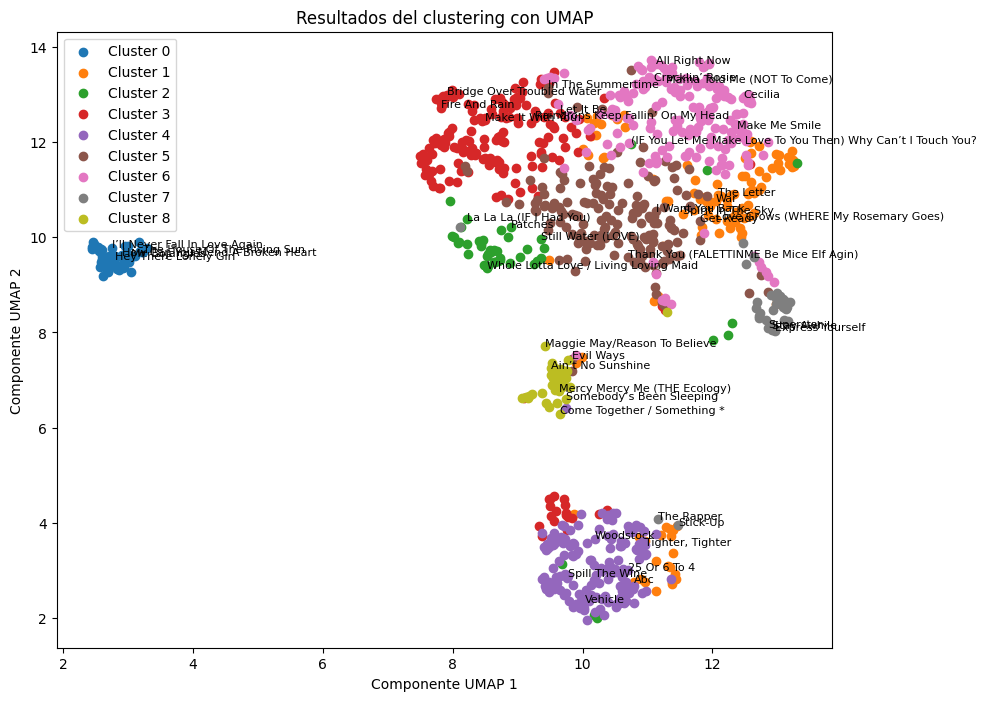

In [29]:
# Reducir la dimensionalidad de los datos usando UMAP para poder mostrar en un gráfico los clusters para poder analizarlo.
import matplotlib.pyplot as plt
import pandas as pd
import umap

songs = ds_copy['Track'].copy()

umap_results= umap.UMAP(n_components=2).fit_transform(ds_precluster)

# Crear el DataFrame con los resultados de UMAP y los clusters
umap_df = pd.DataFrame({'x': umap_results[:, 0], 'y': umap_results[:, 1], 'Cluster': clusters_kmeans, 'Track': songs})

# Graficar los resultados de UMAP, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))

# Iterar sobre los clusters y plotear los puntos y etiquetas
for cluster_num in range(9):
    # Filtrar puntos del cluster actual
    cluster_points = umap_df[umap_df['Cluster'] == cluster_num]
    
    # Graficar los puntos del cluster
    plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster_num}')

    # Seleccionar hasta 5 canciones únicas para etiquetar
    songs_to_label = cluster_points['Track'].unique()[:5]

    # Agregar etiquetas de las canciones seleccionadas
    for song in songs_to_label:
        row = cluster_points[cluster_points['Track'] == song].iloc[0]  # Seleccionar solo la primera ocurrencia de cada canción
        plt.text(row['x'], row['y'], song, fontsize=8)

# Configuración del gráfico
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.title('Resultados del clustering con UMAP')
plt.legend()
plt.show()


Luego del análisis de los gráficos, y de probar con distintas cantidades de clusters decidimos dejar de lado un análisis más profundo de los clusters dado que no podemos ver un comportamiento de grupos claro en los datos. A continuación probaremos con un algoritmo de cluster jerárquico para ver si de esta forma logramos detectar mejor grupos en los datos.

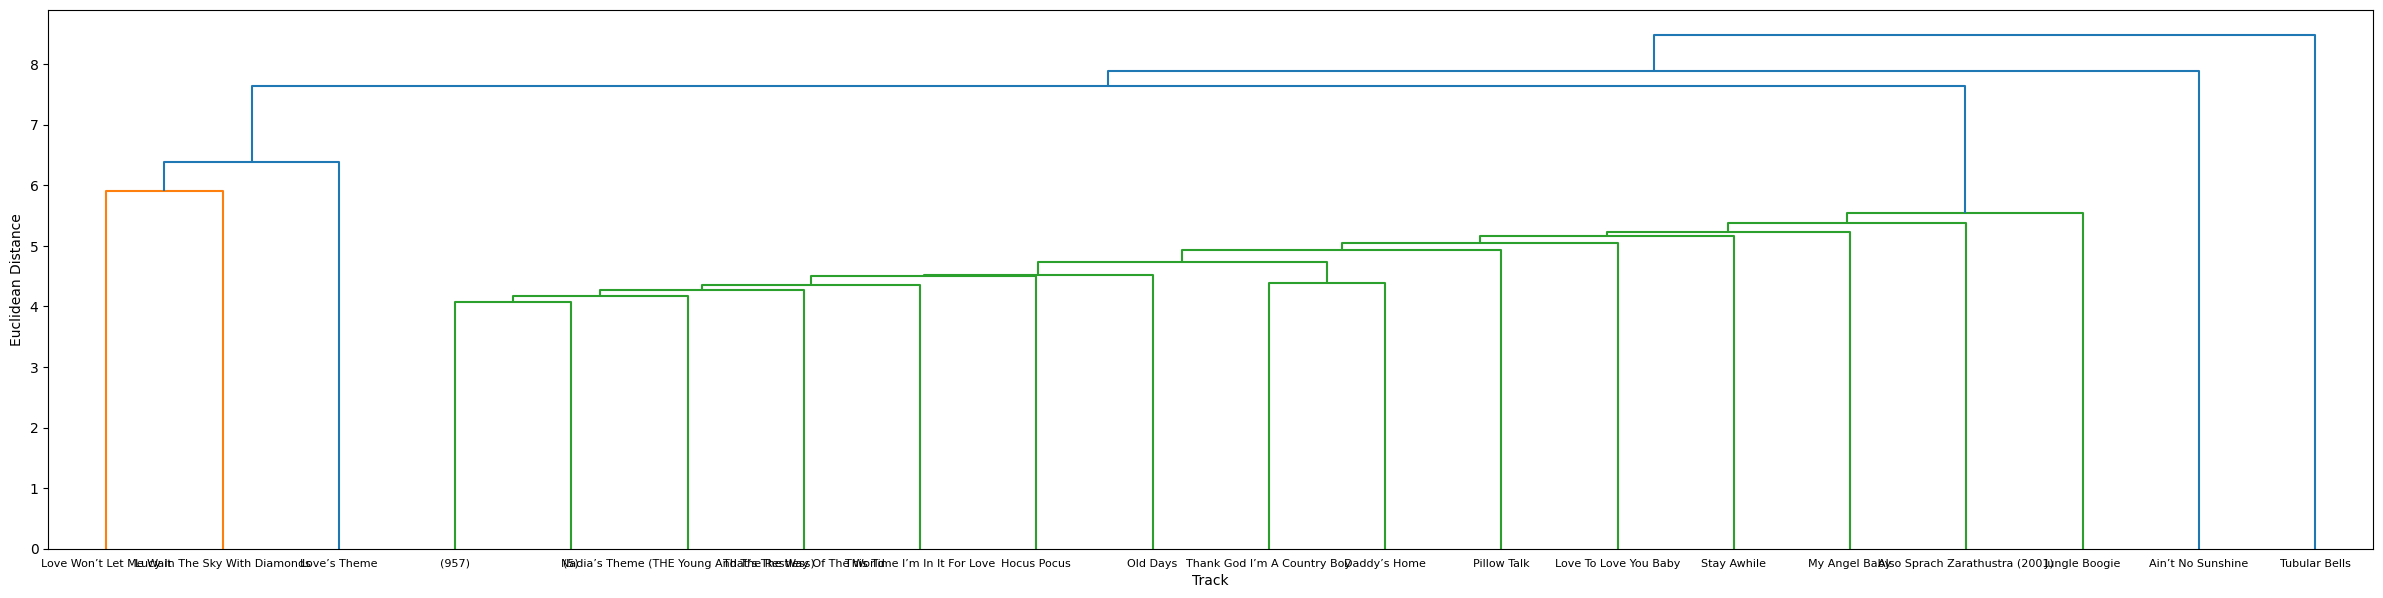

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
songs = ds_copy['Track'].copy()
# generamos el clustering jerárquico
linked = linkage(ds_precluster, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           labels=list(songs), # oko que hay que pasarle una lista
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8,
           p=15,
           truncate_mode ='level' )
plt.xlabel('Track')
plt.ylabel('Euclidean Distance')
plt.show()

Luego del análisis del dendograma podemos observar que las canciones se van agregando de a una al cluster que contiene a la totalidad de canciones. Por lo tanto, concluimos que los datos en el dataset no poseen un comportamiento de grupos que merezca la pena ser analizable.

-----------


###
<div style="text-align: center">
    <h2>Análisis de las hipótesis</h2>
</div>

#### Las canciones que tienen valores más altos de positividad y alegría hoy en día son las más populares.

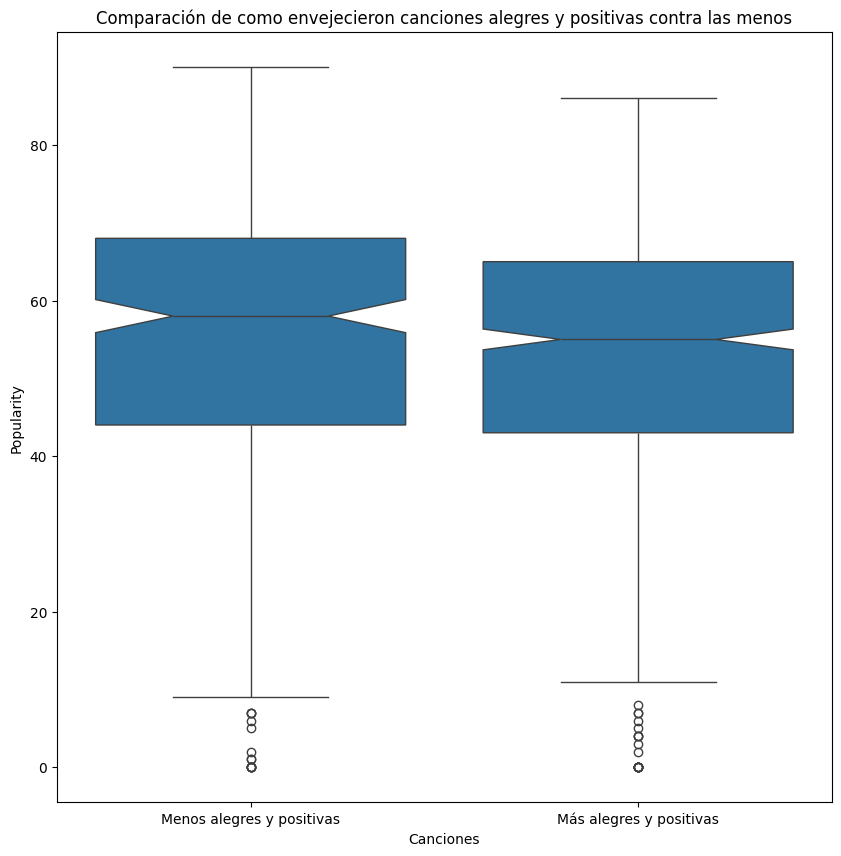

In [31]:
ds_alegres = ds_copy.copy()

# Crear la columna "Alegres" en ds_alegres
ds_alegres["Alegres"] = ds_filtred["Valence"].between(0.5, 1)

# Filtrar la popularidad para canciones alegres y positivas y las que no lo son
ds_esAlegre = ds_alegres[ds_alegres["Alegres"] == 1]["Popularity"]
ds_noAlegre = ds_alegres[ds_alegres["Alegres"] == 0]["Popularity"]



plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Alegres', y = 'Popularity', data=ds_alegres, notch= True)
plt.title("Comparación de como envejecieron canciones alegres y positivas contra las menos")
plt.xticks(ticks=[0, 1], labels=["Menos alegres y positivas", "Más alegres y positivas"])
plt.xlabel("Canciones")
plt.ylabel("Popularity")

plt.show()

In [32]:
from scipy.stats import shapiro
# Test de Shapiro-Wilk para canciones alegres y positivas
stat, p = shapiro(ds_esAlegre)
print(f"Test de Shapiro-Wilk para las canciones más positivas y alegres: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones que no son alegres y positivas
stat, p = shapiro(ds_noAlegre)
print(f"Test de Shapiro-Wilk para las canciones menos positivas y alegres: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para las canciones más positivas y alegres: Estadístico=0.958, p-valor=0.000
Test de Shapiro-Wilk para las canciones menos positivas y alegres: Estadístico=0.940, p-valor=0.000


In [33]:
import scipy.stats as stats
stat, p = stats.levene(ds_esAlegre, ds_noAlegre)
print(f"Test de Levene entre canciones más positivas y alegres contra menos positivas y alegres: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene entre canciones más positivas y alegres contra menos positivas y alegres: Estadístico=2.821, p-valor=0.093


In [34]:
# Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones
stat, p = stats.mannwhitneyu(ds_esAlegre, ds_noAlegre, alternative= 'greater')
print(f"Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones más positivas y alegres no son más populares actualmente que las que no poseen esas características.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones más positivas y alegres son más populares actualmente que las que no poseen esas características.")

Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones: Estadístico=96999.500, p-valor=0.963
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones más positivas y alegres no son más populares actualmente que las que no poseen esas características.


---

#### Las canciones compuestas con 4 pulsaciones por compas durante la década del 1970 actualmente son más populares que aquellas que fueron compuestas con un distinto número.

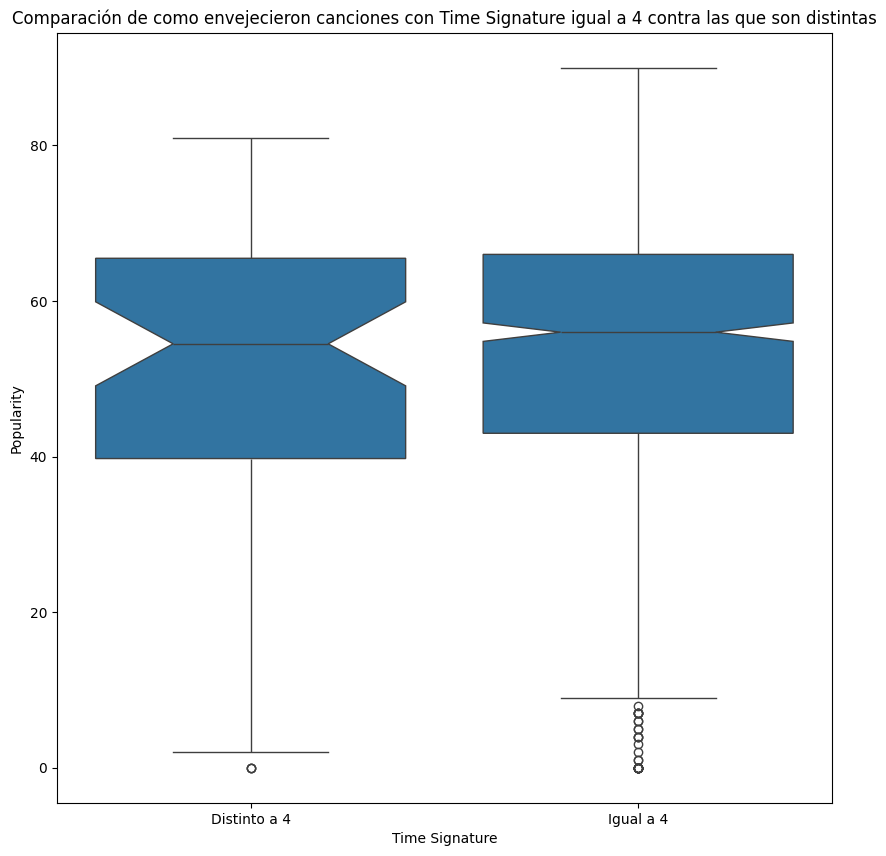

In [35]:
import numpy as np
ds_ts = ds_copy.copy()

# Filtrar la popularidad para cada firma de tiempo
ds_ts_4 = ds_ts[ds_ts["Time_Signature"] == 4]["Popularity"]
ds_ts_n4 = ds_ts[ds_ts["Time_Signature"] != 4]["Popularity"]

ds_ts["TS4"] = np.where(ds_filtred["Time_Signature"] == 4, 1, 0)


plt.figure(figsize=(10, 10))
sns.boxplot(x = 'TS4', y = 'Popularity', data=ds_ts, notch= True)
plt.title("Comparación de como envejecieron canciones con Time Signature igual a 4 contra las que son distintas")
plt.xticks(ticks=[0, 1], labels=["Distinto a 4", "Igual a 4"])
plt.xlabel("Time Signature")
plt.ylabel("Popularity")

plt.show()

In [36]:
# Test de Shapiro-Wilk para canciones con time_signature igual a 4
stat, p = shapiro(ds_ts_4)
print(f"Test de Shapiro-Wilk para canciones con time_signature igual a 4: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones con time_signature distinto a 4
stat, p = shapiro(ds_ts_n4)
print(f"Test de Shapiro-Wilk para canciones con time_signature distinto a 4: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para canciones con time_signature igual a 4: Estadístico=0.956, p-valor=0.000
Test de Shapiro-Wilk para canciones con time_signature distinto a 4: Estadístico=0.919, p-valor=0.001


In [37]:
stat, p = stats.levene(ds_ts_4, ds_ts_n4)
print(f"Test de Levene para canciones con distintos numeros de pulsaciones por compas: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones con distintos numeros de pulsaciones por compas: Estadístico=0.992, p-valor=0.319


In [38]:
# Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature
stat, p = stats.mannwhitneyu(ds_ts_4, ds_ts_n4, alternative= 'greater')
print(f"Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones con Time Signature igual a 4 no son más populares a las demás.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones con Time Signature igual a 4 son más populares a las demás.")

Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature: Estadístico=27247.000, p-valor=0.252
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones con Time Signature igual a 4 no son más populares a las demás.


---

#### Existe una relación entre las canciones que son bailables y las que son instrumentales.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11888\1941591097.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


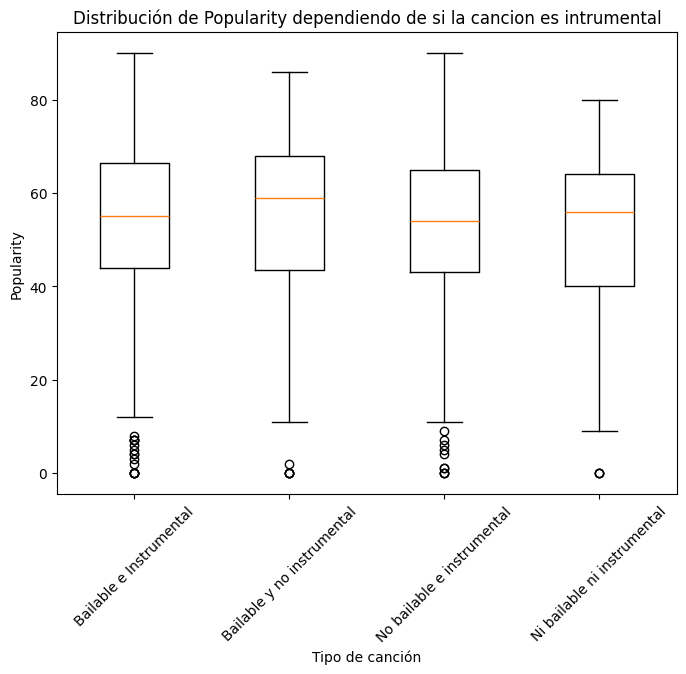

In [39]:
ds_bailables = ds_filtred.copy()

# Crear la columna "Bailable" en ds_bailables
ds_bailables["Bailable"] = ds_filtred["Danceability"].between(0.5, 1)
ds_bailables["Instrumental"] = ds_filtred["Instrumentalness"] != 0

# Filtrar la popularidad para diferentes combinaciones de canciones bailables e instrumentales
ds_BaiIns = ds_bailables[(ds_bailables["Bailable"] == 1) & (ds_bailables["Instrumental"] == 1)].copy()
ds_Bai = ds_bailables[(ds_bailables["Bailable"] == 1) & (ds_bailables["Instrumental"] == 0)].copy()
ds_Ins = ds_bailables[(ds_bailables["Bailable"] == 0) & (ds_bailables["Instrumental"] == 1)].copy()
ds_NbaiNins = ds_bailables[(ds_bailables["Bailable"] == 0) & (ds_bailables["Instrumental"] == 0)].copy()


# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [ds_BaiIns["Popularity"], ds_Bai["Popularity"], ds_Ins["Popularity"], ds_NbaiNins["Popularity"]],
    labels=["Bailable e Instrumental", "Bailable y no instrumental", "No bailable e instrumental", "Ni bailable ni instrumental"]
)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de canción")
plt.ylabel("Popularity")
plt.xticks(rotation=45, fontsize=10)
# Agregar un título al gráfico
plt.title("Distribución de Popularity dependiendo de si la cancion es intrumental")

# Mostrar el gráfico
plt.show()


In [40]:
from scipy.stats import chi2_contingency


# Crear tabla de contingencia 2x2
tabla_contingencia = pd.DataFrame(
    [[len(ds_BaiIns), len(ds_Bai)],    # Bailables
     [len(ds_Ins), len(ds_NbaiNins)]], # No Bailables
    columns=["Instrumental", "No Instrumental"],
    index=["Bailable", "No Bailable"]
)

print("Tabla de contingencia:")
print(tabla_contingencia)

# Aplicar test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")  
print("Frecuencias esperadas:")
print(expected)

Tabla de contingencia:
             Instrumental  No Instrumental
Bailable              495              220
No Bailable           200               65
Chi-cuadrado: 3.354961527129019
p-valor: 0.06700277644591061
Grados de libertad: 1
Frecuencias esperadas:
[[507.06632653 207.93367347]
 [187.93367347  77.06632653]]


---


#### Las canciones en la primera mitad de la década tienen diferencias significativas con respecto al estilo, contra las de la segunda mitad.

##### ¿Existen diferencias en la intensidad y actividad de las canciones entre los lustros?

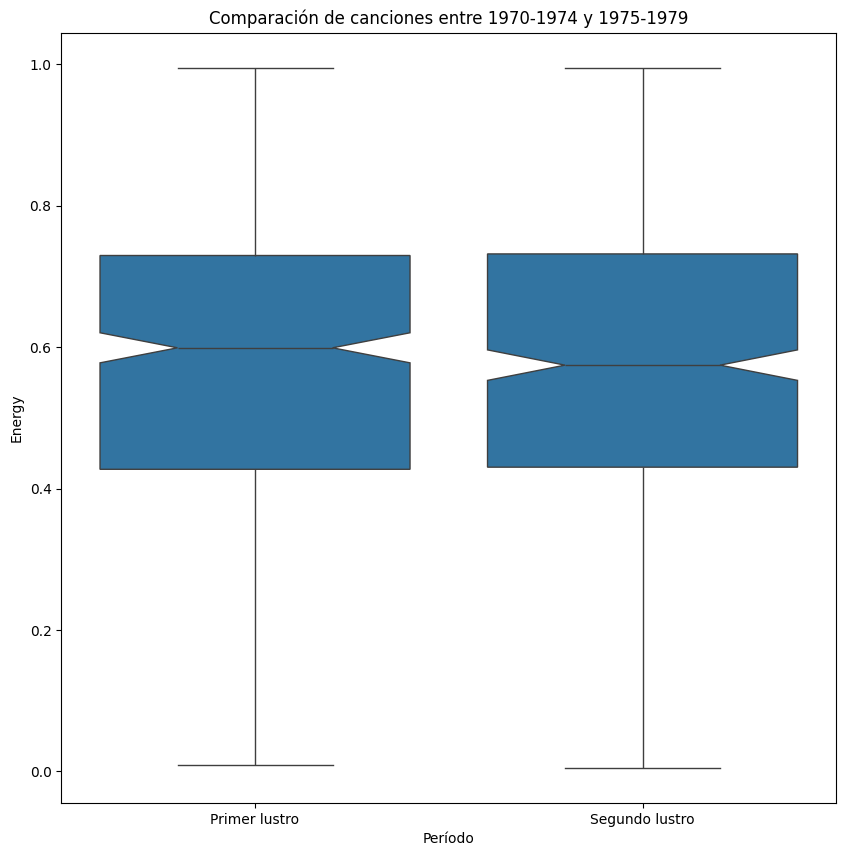

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

ds_anios = ds_filtred.copy()
ds_anios["Antes del 1975"] = ds_copy["Year"].between(1970, 1974)


ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Energy"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Energy"]



# Crear el gráfico boxplot para comparar Energy
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Energy', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Energy")

plt.show()


In [42]:

# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.989, p-valor=0.001
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.988, p-valor=0.000


In [43]:
stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.001, p-valor=0.972


In [44]:
# Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Energy al ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Energy al ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones: Estadístico=118854.500, p-valor=0.793
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Energy al ser divididas por lustro.


------------------------------------------------------------

##### ¿Existen diferencias en la calidad acústica de las canciones entre los lustros?

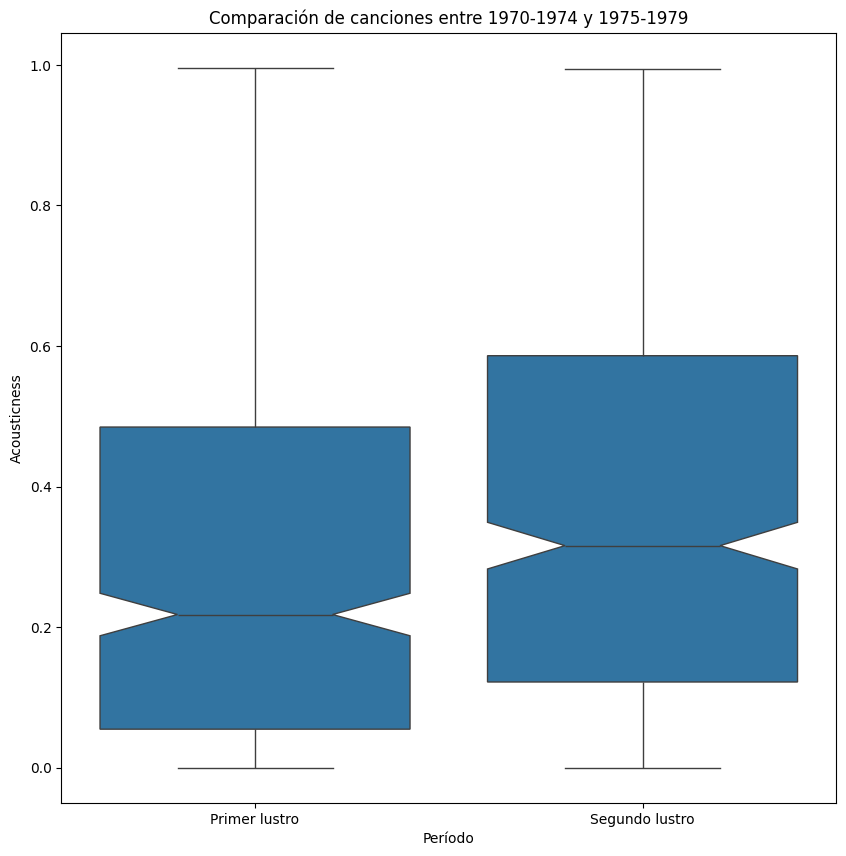

In [45]:
# Crear el gráfico boxplot para comparar Acousticness
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Acousticness"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Acousticness"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Acousticness', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Acousticness")

plt.show()

In [46]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.932, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.887, p-valor=0.000


In [47]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.609, p-valor=0.435


In [48]:
# Test de Mann-Whitney U para comparar la relación entre lustros y Acousticness de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y Acousticness de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Acousticness al ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Acousticness al ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y Acousticness de las canciones: Estadístico=138150.500, p-valor=0.000
Se rechaza la hipótesis nula.
Las canciones de la década del 1970 tienen grandes diferencias en Acousticness al ser divididas por lustro.


--------------------------------------------------

##### ¿Existen diferencias en la velocidad o ritmo de las canciones entre los lustros?

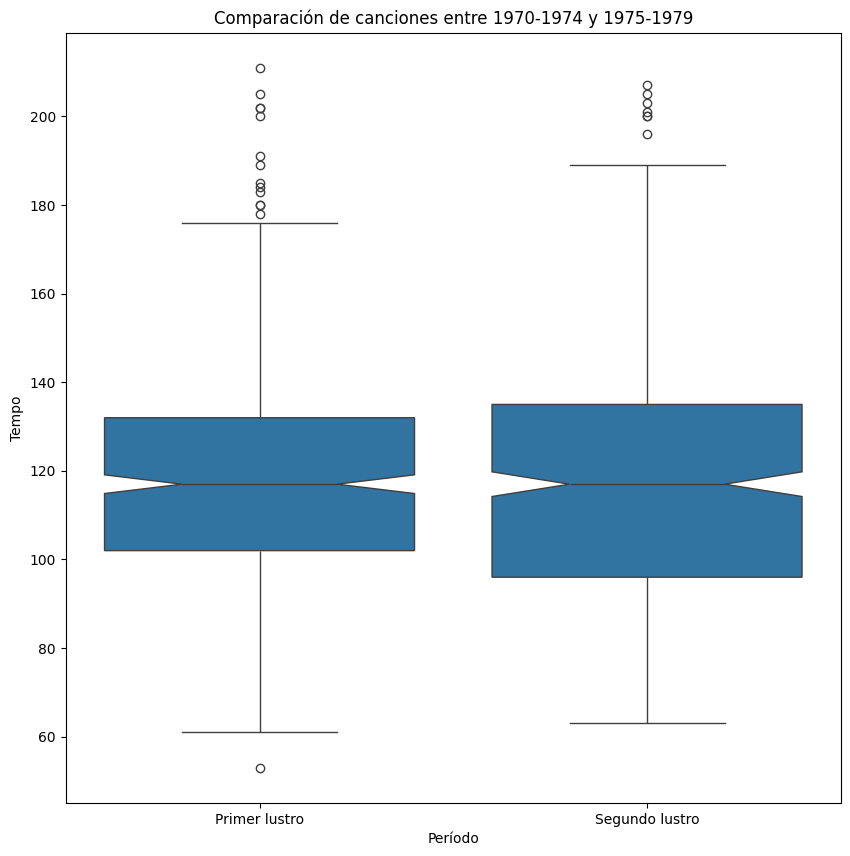

In [49]:
# Crear el gráfico boxplot para comparar Tempo
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Tempo"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Tempo"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Tempo', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Tempo")

plt.show()

In [50]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.973, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.975, p-valor=0.000


In [51]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=11.798, p-valor=0.001


In [52]:
# Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones
stat, p = stats.kruskal(ds_7074, ds_7579)
print(f"Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Tempo al ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Tempo al ser divididas por lustro.")

Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones: Estadístico=0.040, p-valor=0.841
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Tempo al ser divididas por lustro.


---

##### ¿Existen diferencias en el volumen promedio de las canciones entre los lustros?

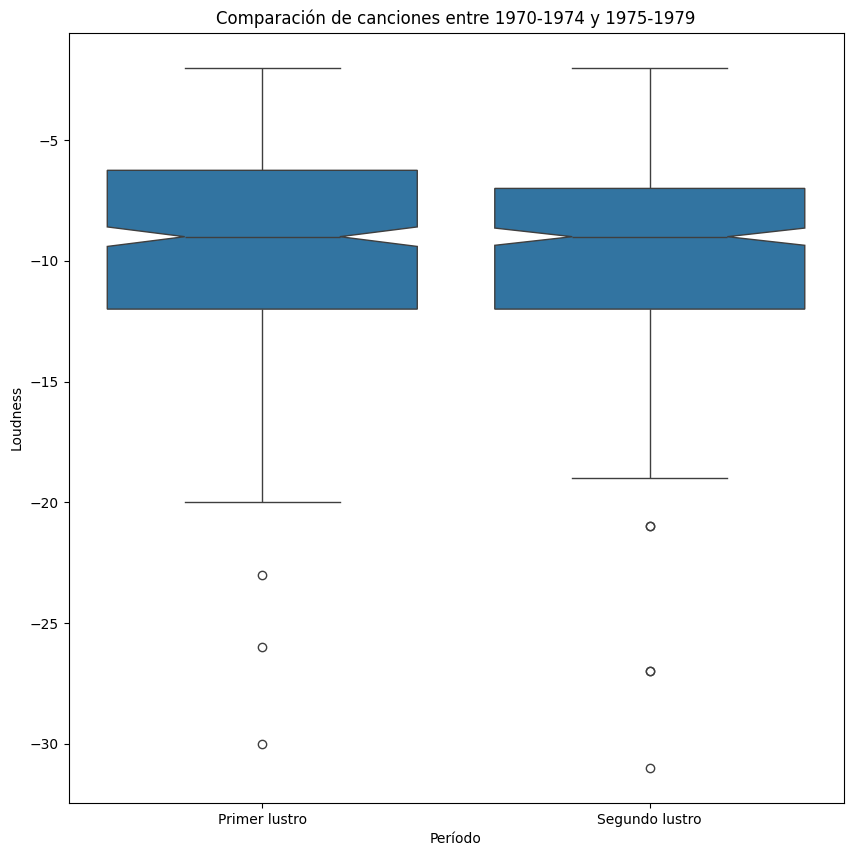

In [53]:
# Crear el gráfico boxplot para comparar Loudness
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Loudness"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Loudness"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Loudness', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Loudness")

plt.show()

In [54]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.949, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.947, p-valor=0.000


In [55]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.503, p-valor=0.478


In [56]:
# Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Loudness al ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Loudness al ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones: Estadístico=113736.000, p-valor=0.155
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Loudness al ser divididas por lustro.


----


###
<div style="text-align: center">
    <h2>Regresión Lineal</h2>
</div>

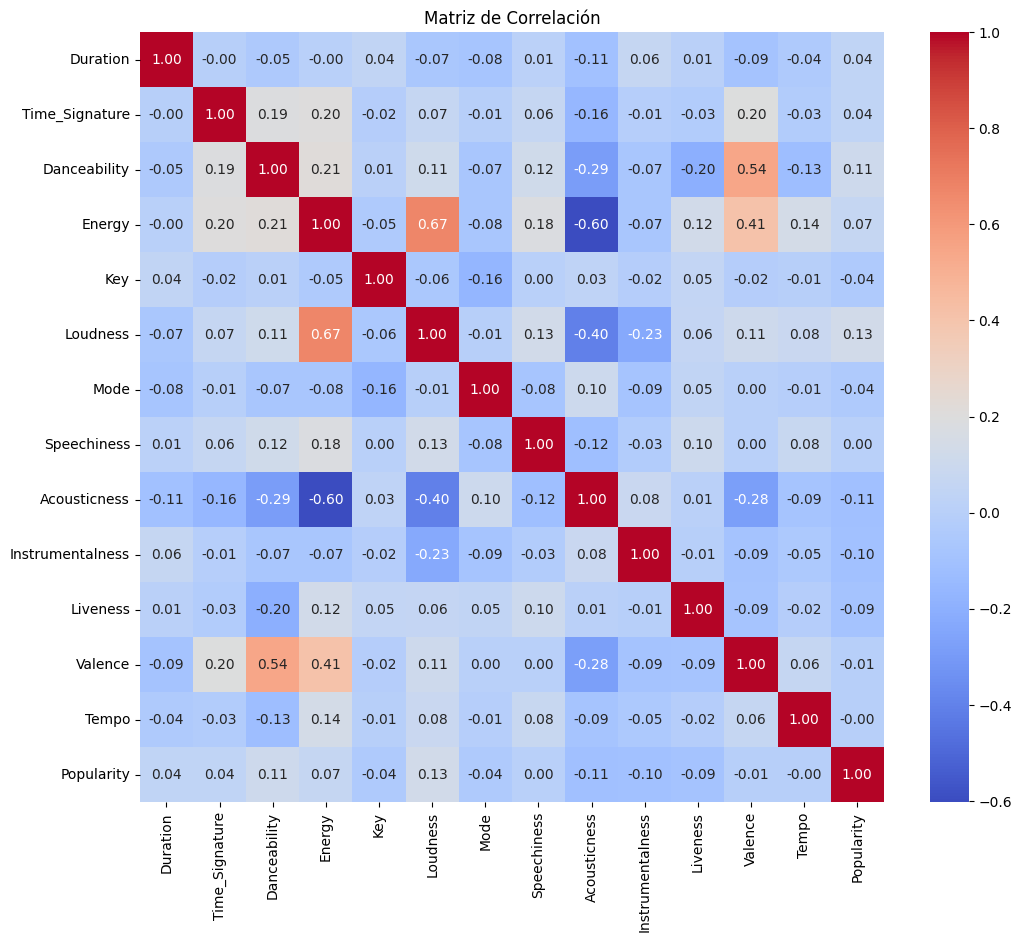

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculamos la matriz de correlación
correlation_matrix = ds_filtred.corr()
# la graficamos con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

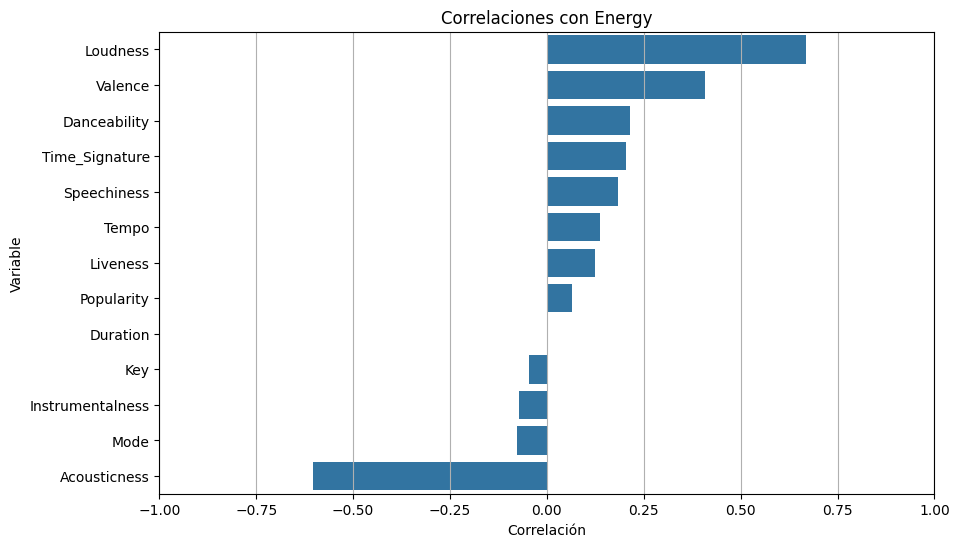

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con MedHouseVal
medhouseval_correlations = correlation_matrix['Energy'].drop('Energy')

# Ordena las correlaciones de mayor a menor
sorted_correlations = medhouseval_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con Energy')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

Podemos observar que acousticness, loudness y valance tienen correlacion alta con energy, ¿será que con estos valores podemos llegar a predecir el valor de energy?

In [59]:
ds_model = ds_filtred[["Acousticness", "Loudness", "Valence", "Danceability"]]
ds_objetivo = ds_filtred["Energy"]

# Estandarizar las variables predictoras
scaler = StandardScaler()
ds_scaled_model = scaler.fit_transform(ds_model)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
ds_scaled_model = pd.DataFrame(ds_scaled_model, columns=ds_model.columns)

In [60]:
import statsmodels.api as sm

# Agregamos una constante como característica, para estimar la ordenada al origen
ds_scaled_model = sm.add_constant(ds_scaled_model)
# Ajustamos el modelo
model = sm.OLS(ds_objetivo, ds_scaled_model).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     455.3
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.79e-221
Time:                        18:32:30   Log-Likelihood:                 691.84
No. Observations:                 980   AIC:                            -1374.
Df Residuals:                     975   BIC:                            -1349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5809      0.004    151.851   

In [61]:
# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(ds_scaled_model).describe().loc[['mean', 'std']])


Medias y desviaciones estándar después del escalado:
      const  Acousticness      Loudness       Valence  Danceability
mean    1.0  1.160070e-16  1.812609e-17 -2.247635e-16 -2.247635e-16
std     0.0  1.000511e+00  1.000511e+00  1.000511e+00  1.000511e+00


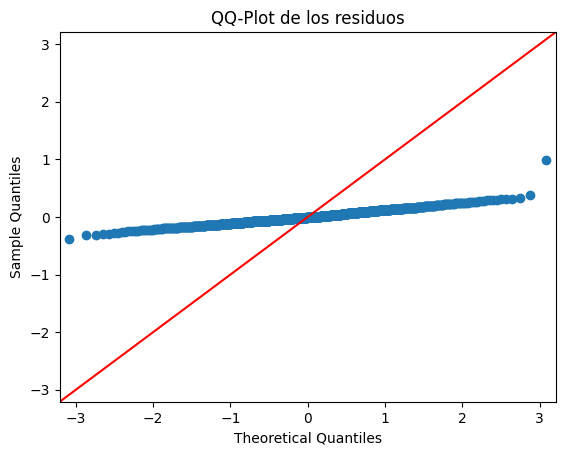

In [62]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

Concluimos que el modelo de regresión lineal creado no es bueno dado que el error no es normal.

---

###
<div style="text-align: center">
    <h2>Modelo Predictivo de la variable Energy</h2>
</div>

In [63]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

X = ds_filtred.drop(columns=["Energy"]) 
y = ds_filtred["Energy"]

# Discretizamos la variable objetivo para la estratificación
y_binned = pd.cut(y, bins=3, labels=False)

# Partimos los datos en entrenamiento y test, sacando el 30% para los datos de test
# y el restante 70% para los de entrenamiento, estratificando usando la versión "binneada"
# de la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=10, # usamos una semilla aleatoria para ser reproducibles
                                                    stratify = y_binned)

print("ANTES de sacar los datos de validación:")
print("Entrenamiento = {}".format(X_train.shape))
print("Test = {}".format(X_test.shape))
print("---------------------------------------")

# Repetimos el estratificado con y_train porque no tenemos los índices del estratificado anterior
y_train_binned = pd.cut(y_train, bins=3, labels=False)

# y aplicamos nuevamente la función pero sobre los datos de entrenamiento, esta vez
# para extraer los datos de validación, tomando el 10% para ese conjunto
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=10, # usamos una semilla aleatoria para ser reproducibles
                                                  stratify = y_train_binned)

print("DESPUÉS de sacar los datos de validación:")
print("Entrenamiento = {}".format(X_train.shape))
print("Validación = {}".format(X_val.shape))
print("Test = {}".format(X_test.shape))
print("---------------------------------------")

ANTES de sacar los datos de validación:
Entrenamiento = (686, 13)
Test = (294, 13)
---------------------------------------
DESPUÉS de sacar los datos de validación:
Entrenamiento = (617, 13)
Validación = (69, 13)
Test = (294, 13)
---------------------------------------


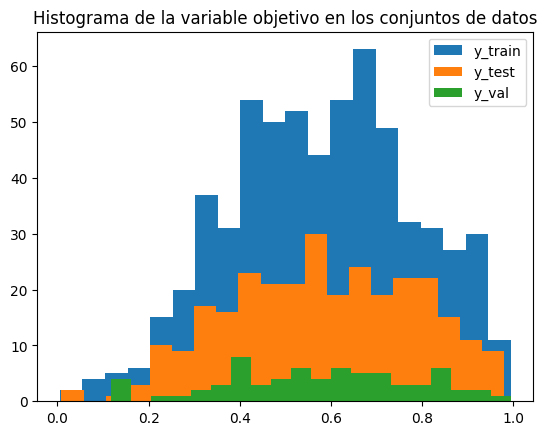

In [64]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=20, label='y_train')
plt.hist(y_test, bins=20, label='y_test')
plt.hist(y_val, bins=20, label='y_val')
plt.legend(loc='upper right')
plt.title('Histograma de la variable objetivo en los conjuntos de datos')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

# creamos un standard scaler
scaler = StandardScaler()
# y lo fiteamos con los datos de entrenamiento
scaler.fit(X_train)

# podemos acceder a las medias y desvíos que calculamos, si queremos
print("Medias = {}".format(scaler.mean_))
print("Desvíos = {}".format(np.sqrt(scaler.var_)))

# estandarizamos las muestras de entrenamiento
X_train_stand = scaler.transform(X_train)

Medias = [ 2.30066451e+02  3.94003241e+00  5.89433063e-01  5.10048622e+00
 -9.38087520e+00  7.61750405e-01  6.01902755e-02  3.36425073e-01
  5.19009560e-02  1.75153809e-01  6.23681378e-01  1.18508914e+02
  5.29141005e+01]
Desvíos = [8.98206413e+01 2.97970443e-01 1.60339153e-01 3.56776716e+00
 3.69622312e+00 4.26012588e-01 6.51304897e-02 2.79279617e-01
 1.74231928e-01 1.55374814e-01 2.55401971e-01 2.70462777e+01
 1.80980782e+01]


In [66]:
from sklearn.linear_model import LinearRegression

# creamos un modelo de regresión lineal, indicándole que queremos
# que ajuste la ordenada al origen
model = LinearRegression(fit_intercept=True)

# entrenamos el modelo
model.fit(X_train_stand, y_train)

LinearRegression()

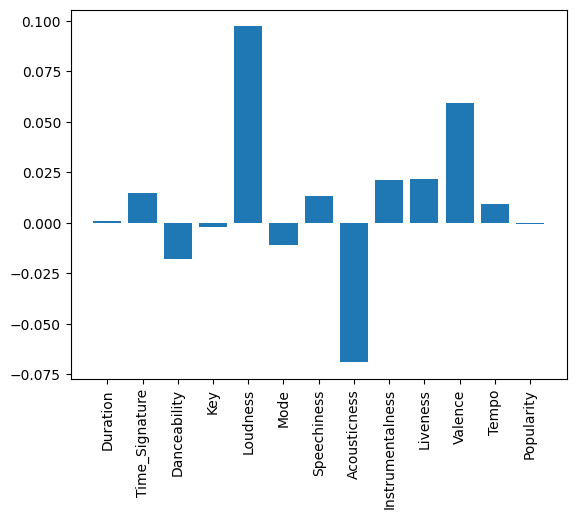

In [67]:
# recuperamos sus coeficientes aprendidos
theta = model.coef_

# y los mostramos por pantalla
fig = plt.figure()
ax = fig.gca()
ax.bar(np.arange(0,theta.size), np.squeeze(theta))
labels = X.columns
ax.set_xticks(np.arange(0,theta.size))
ax.set_xticklabels(labels=labels, rotation = 90)
plt.show()

In [68]:
# agregamos el scaler como un atributo al objeto para no perderlo
model.standardizer_ = scaler
# estandarizamos los datos de validación y predecimos
X_val_stand = model.standardizer_.transform(X_val)
y_pred_val = model.predict(X_val_stand)
# mostramos lo que obtuvimos
print("Valores obtenidos: {}".format(y_pred_val))
# y lo que esperábamos obtener
print("Valores esperados: {}".format(np.array(y_val)))

Valores obtenidos: [0.67099439 0.74191734 0.60256744 0.71280612 0.46844457 0.75940475
 0.24784483 0.553088   0.60590834 0.5282493  0.56986194 0.53083276
 0.50113475 0.77284885 0.67718165 0.24940556 0.5905022  0.50281747
 0.83839936 0.56958248 0.60670926 0.64341695 0.74025763 0.50108691
 0.33548366 0.85358469 0.85040665 0.80173565 0.11990982 0.51455587
 0.66105645 0.81096645 0.53257839 0.49719363 0.7479355  0.63552926
 0.72590729 0.57402961 0.56054156 0.48712724 0.5603516  0.55836397
 0.48310908 0.80763369 0.8640425  0.69095685 0.52939387 0.46053347
 0.24784483 0.63103764 0.54177102 0.6406412  0.54675564 0.47561002
 0.25972478 0.60096584 0.61611596 0.65381978 0.43703764 0.83334249
 0.45086886 0.68661896 0.5813299  0.57866491 0.60011626 0.53507527
 0.23277429 0.84632906 0.50144205]
Valores esperados: [0.65  0.816 0.778 0.654 0.553 0.822 0.16  0.573 0.539 0.402 0.423 0.443
 0.464 0.949 0.836 0.244 0.585 0.401 0.891 0.402 0.538 0.603 0.561 0.416
 0.284 0.722 0.995 0.897 0.14  0.673 0.736 0

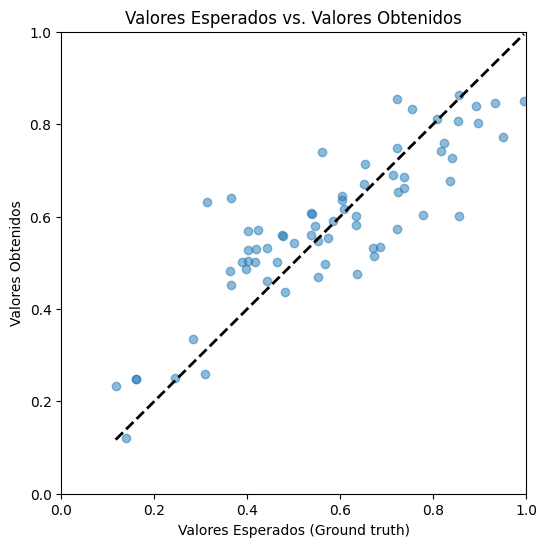

In [69]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.xlabel("Valores Esperados (Ground truth)")
plt.ylabel("Valores Obtenidos")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.title("Valores Esperados vs. Valores Obtenidos")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()

In [70]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculamos las métricas
mse = mean_squared_error(y_val, y_pred_val)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred_val)

# las imprimimos por pantalla
print("MSE = {:.4f}".format(mse))
print("RMSE = {:.4f}".format(rmse))
print("MAE = {:.4f}".format(mae))

MSE = 0.0118
RMSE = 0.1085
MAE = 0.0873


In [71]:
# Predecir en X_train_stand y X_val_stand
y_pred_train = model.predict(X_train_stand)
y_pred_val = model.predict(X_val_stand)

# Calcular el MAE para entrenamiento y validación
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

print("MAE en entrenamiento: {:.4f}".format(mae_train))
print("MAE en validación: {:.4f}".format(mae_val))

MAE en entrenamiento: 0.0929
MAE en validación: 0.0873


In [72]:
from sklearn.linear_model import Ridge

# Creamos un modelo de Ridge Regression con un valor alto de alpha
ridge_model_high_alpha = Ridge(alpha=1000)
# Le asociamos el scaler así no lo perdemos
ridge_model_high_alpha.standardizer_ = scaler
# Entrenamos el modelo
ridge_model_high_alpha.fit(X_train_stand, y_train)

Ridge(alpha=1000)

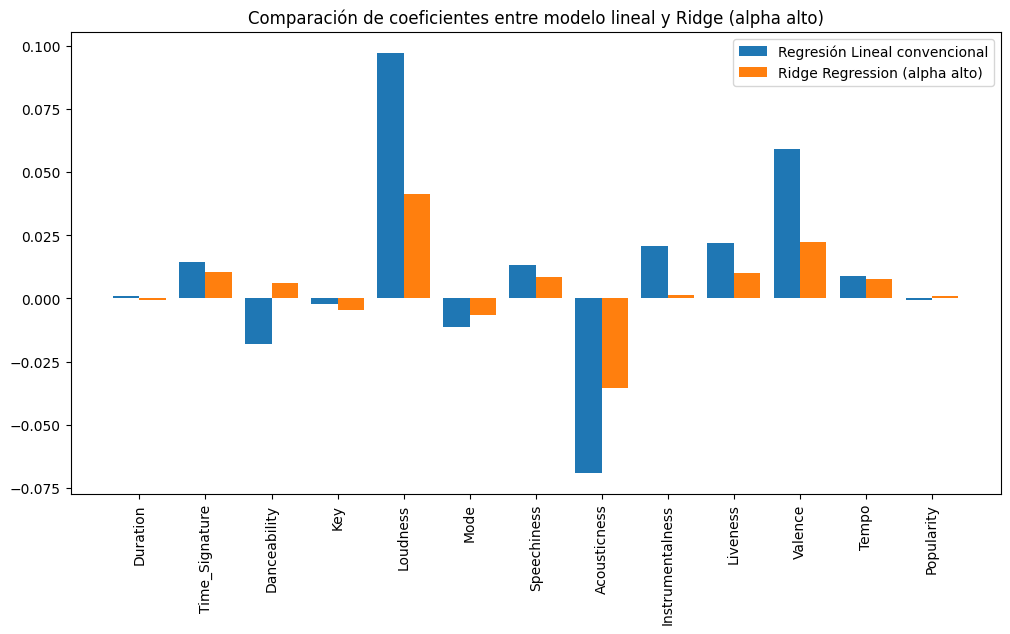

In [73]:
# Recuperamos los coeficientes del modelo Ridge
theta_ridge_high_alpha = ridge_model_high_alpha.coef_

# graficamos los dos
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta.size) - 0.2, np.squeeze(theta), width=0.4, label='Regresión Lineal convencional')
ax.bar(np.arange(0, theta_ridge_high_alpha.size) + 0.2, np.squeeze(theta_ridge_high_alpha), width=0.4, label='Ridge Regression (alpha alto)')
labels = X.columns
ax.set_xticks(np.arange(0, theta.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.legend()
ax.set_title('Comparación de coeficientes entre modelo lineal y Ridge (alpha alto)')
plt.show()

In [74]:
# Definimos los valores de alpha que queremos probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Creamos una lista vacía para almacenar los errores MAE para cada valor de alpha
mae_list = []

# Iteramos sobre los valores de alpha
for alpha in alphas:
  # Creamos un modelo de Ridge Regression con el valor de alpha actual
  ridge_model = Ridge(alpha=alpha)
  ridge_model.standardizer_ = scaler
  # Entrenamos el modelo
  ridge_model.fit(X_train_stand, y_train)
  # Predecimos en X_val_stand
  y_pred_val_ridge = ridge_model.predict(X_val_stand)
  # Calculamos el MAE
  mae_val_ridge = mean_absolute_error(y_val, y_pred_val_ridge)
  # Almacenamos el error MAE
  mae_list.append(mae_val_ridge)


# Encontrar el mejor alpha
best_alpha = alphas[np.argmin(mae_list)]
print("El mejor alpha es: ", best_alpha)

# Entrenar el modelo final con el mejor alpha
ridge_model_best_alpha = Ridge(alpha=best_alpha)
ridge_model_best_alpha.standardizer_ = scaler
ridge_model_best_alpha.fit(X_train_stand, y_train)
# Predecir en X_val_stand con el mejor modelo
y_pred_val_ridge_best_alpha = ridge_model_best_alpha.predict(X_val_stand)
# Calcular el MAE para el mejor modelo
mae_val_ridge_best_alpha = mean_absolute_error(y_val, y_pred_val_ridge_best_alpha)

print("MAE en validación (modelo convencional): {:.5f}".format(mae_val))
print("MAE en validación (Ridge, mejor alpha): {:.5f}".format(mae_val_ridge_best_alpha))


El mejor alpha es:  0.001
MAE en validación (modelo convencional): 0.08726
MAE en validación (Ridge, mejor alpha): 0.08726


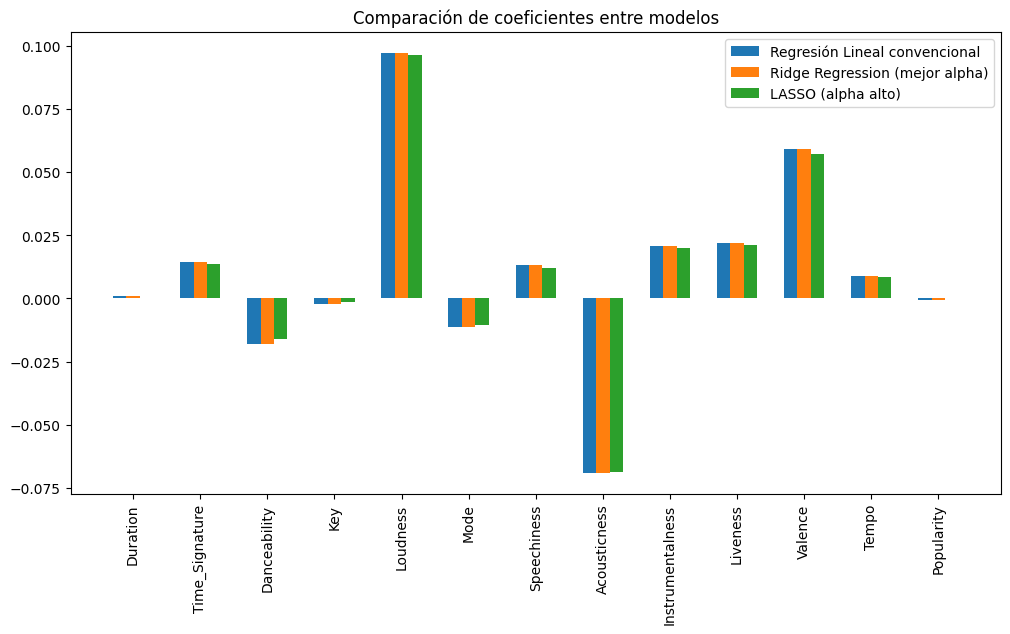

In [75]:
from sklearn.linear_model import Lasso

# Creamos un modelo de LASSO con un valor alto de alpha
lasso_model_high_alpha = Lasso(alpha=0.001)
# Le asociamos el scaler así no lo perdemos
lasso_model_high_alpha.standardizer_ = scaler
# Entrenamos el modelo
lasso_model_high_alpha.fit(X_train_stand, y_train)

# Recuperamos los coeficientes del modelo LASSO
theta_lasso_high_alpha = lasso_model_high_alpha.coef_
# Y nos traemos ya que estamos los del modelo con el mejor alpha
theta_ridge_best_alpha = ridge_model_best_alpha.coef_

# Graficamos los coeficientes de los tres modelos
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta.size) - 0.2, np.squeeze(theta), width=0.2, label='Regresión Lineal convencional')
ax.bar(np.arange(0, theta_ridge_best_alpha.size), np.squeeze(theta_ridge_best_alpha), width=0.2, label='Ridge Regression (mejor alpha)')
ax.bar(np.arange(0, theta_lasso_high_alpha.size) + 0.2, np.squeeze(theta_lasso_high_alpha), width=0.2, label='LASSO (alpha alto)')
labels = X.columns
ax.set_xticks(np.arange(0, theta.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.legend()
ax.set_title('Comparación de coeficientes entre modelos')
plt.show()

In [76]:
# Definimos los valores de alpha que queremos probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Creamos una lista vacía para almacenar los errores MAE para cada valor de alpha
mae_list_lasso = []

# Iteramos sobre los valores de alpha
for alpha in alphas:
  # Creamos un modelo de Lasso Regression con el valor de alpha actual
  lasso_model = Lasso(alpha=alpha)
  lasso_model.standardizer_ = scaler
  # Entrenamos el modelo
  lasso_model.fit(X_train_stand, y_train)
  # Predecimos en X_val_stand
  y_pred_val_lasso = lasso_model.predict(X_val_stand)
  # Calculamos el MAE
  mae_val_lasso = mean_absolute_error(y_val, y_pred_val_lasso)
  # Almacenamos el error MAE
  mae_list_lasso.append(mae_val_lasso)

# Encontrar el mejor alpha
best_alpha_lasso = alphas[np.argmin(mae_list_lasso)]
print("El mejor alpha para Lasso es: ", best_alpha_lasso)

# Entrenar el modelo final con el mejor alpha
lasso_model_best_alpha = Lasso(alpha=best_alpha_lasso)
lasso_model_best_alpha.standardizer_ = scaler
lasso_model_best_alpha.fit(X_train_stand, y_train)

# Predecir en X_val_stand con el mejor modelo
y_pred_val_lasso_best_alpha = lasso_model_best_alpha.predict(X_val_stand)

# Calcular el MAE para el mejor modelo
mae_val_lasso_best_alpha = mean_absolute_error(y_val, y_pred_val_lasso_best_alpha)

print("MAE en validación (modelo convencional): {:.5f}".format(mae_val))
print("MAE en validación (Ridge, mejor alpha): {:.5f}".format(mae_val_ridge_best_alpha))
print("MAE en validación (Lasso, mejor alpha): {:.5f}".format(mae_val_lasso_best_alpha))

El mejor alpha para Lasso es:  0.001
MAE en validación (modelo convencional): 0.08726
MAE en validación (Ridge, mejor alpha): 0.08726
MAE en validación (Lasso, mejor alpha): 0.08784


In [77]:
# Estandarizar X_test
X_test_stand = scaler.transform(X_test)

# Evaluar el modelo convencional en X_test_stand
y_pred_test = model.predict(X_test_stand)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Evaluar Ridge con mejor alpha en X_test_stand
y_pred_test_ridge = ridge_model_best_alpha.predict(X_test_stand)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = math.sqrt(mse_test_ridge)

# Evaluar Lasso con mejor alpha en X_test_stand
y_pred_test_lasso = lasso_model_best_alpha.predict(X_test_stand)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = math.sqrt(mse_test_lasso)

print("MAE en test:")
print("Modelo convencional: {:.5f}".format(mae_test))
print("Ridge (mejor alpha): {:.5f}".format(mae_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(mae_test_lasso))

print("\nMSE en test:")
print("Modelo convencional: {:.5f}".format(mse_test))
print("Ridge (mejor alpha): {:.5f}".format(mse_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(mse_test_lasso))

print("\nRMSE en test:")
print("Modelo convencional: {:.5f}".format(rmse_test))
print("Ridge (mejor alpha): {:.5f}".format(rmse_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(rmse_test_lasso))


MAE en test:
Modelo convencional: 0.08514
Ridge (mejor alpha): 0.08514
Lasso (mejor alpha): 0.08547

MSE en test:
Modelo convencional: 0.01128
Ridge (mejor alpha): 0.01128
Lasso (mejor alpha): 0.01133

RMSE en test:
Modelo convencional: 0.10620
Ridge (mejor alpha): 0.10620
Lasso (mejor alpha): 0.10642
